In [1]:
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
from mpl_toolkits import mplot3d as mpl3d
from scipy import signal, stats, linalg, fft

# import our 'specsens' package with the help of 'sys'
import sys
sys.path.insert(0, '..')
import specsens as ss

In [2]:
# general settings for signal and noise
sample_freq = 1e6  # in Hz
length = 0.2  # in s
signal_power = 0.0  # in dB
noise_power = 0.0  # in dB

# create the signal (the 'soft speaker' kind)
wm = ss.WirelessMicrophone(f_sample=sample_freq, t_sec=length)
sig = wm.soft(f_center=-1e5, power=signal_power, dB=True)

# create the noise
wgn = ss.WhiteGaussianNoise(f_sample=sample_freq, t_sec=length)
noise = wgn.signal(power=noise_power, dB=True)

# ensure noise and signal have same length (and create global variable 'num_samples')
assert wm.num_samples == wgn.num_samples
num_samples = wm.num_samples

# create actual signal ('both') comprising of signal and additive white Gaussian noise (AWGN)
both = sig + noise

# print some info about signal and noise
print('Signal power: %.2f dB' % (ss.util.signal_power(sig, dB=True)))
print('Noise power:  %.2f dB' % (ss.util.signal_power(noise, dB=True)))
print('SNR:          %.2f dB' % (ss.util.snr(sig, noise, dB=True)))
print('Num samples:  %d ' % (num_samples))

# ensure that Parseval's theorem holds
ss.util.check_parseval(both, length, sample_freq)

Signal power: 0.00 dB
Noise power:  -0.01 dB
SNR:          0.01 dB
Num samples:  200000 


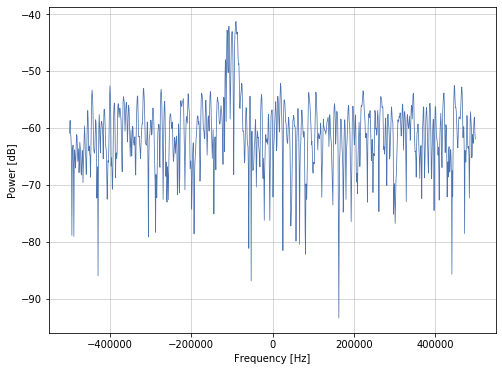

In [3]:
# plot spectrum at one time instance using our short time Fourier transform
sft = ss.Stft(n=1024, window='flattop')
f, x = sft.stft(both[1024:2048], sample_freq, normalized=True, dB=True)

plt.figure(figsize=(8, 6))
plt.plot(f, x, linewidth=0.75, aa=True)
plt.xlabel(r"Frequency [Hz]")
plt.ylabel(r"Power [dB]")
plt.grid(linewidth=0.5)
plt.show()

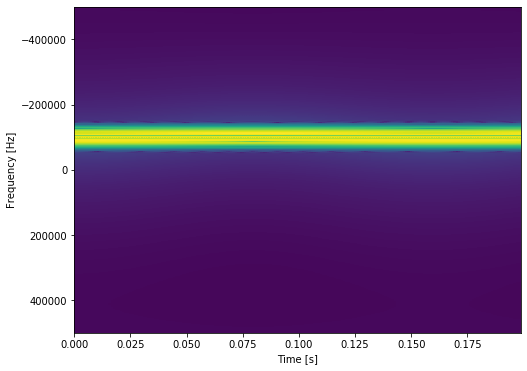

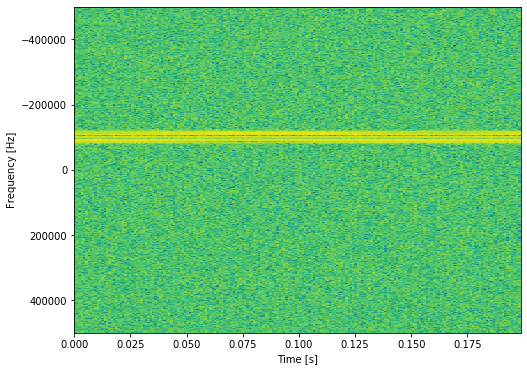

In [4]:
# plot the spectogram using our short time Fourier transform
n = 1024

# signal only
sft = ss.Stft(n=n, window='flattop')
f, t, x = sft.spectogram(sig, sample_freq, normalized=True, dB=True)

plt.figure(figsize=(8, 6))
plt.pcolormesh(t, f, x, cmap='viridis', vmin=np.min(x), vmax=np.max(x))
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.gca().invert_yaxis()
plt.show()

# noise and signal
sft = ss.Stft(n=n, window='flattop')
f, t, x = sft.spectogram(both, sample_freq, normalized=True, dB=True)

plt.figure(figsize=(8, 6))
plt.pcolormesh(t, f, x, cmap='viridis', vmin=np.min(x), vmax=np.max(x))
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.gca().invert_yaxis()
plt.show()

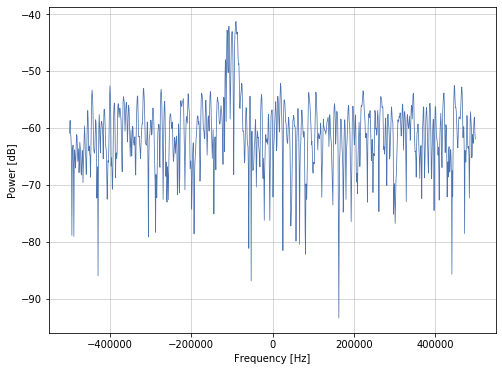

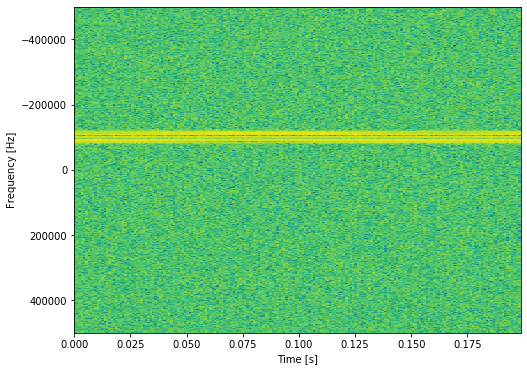

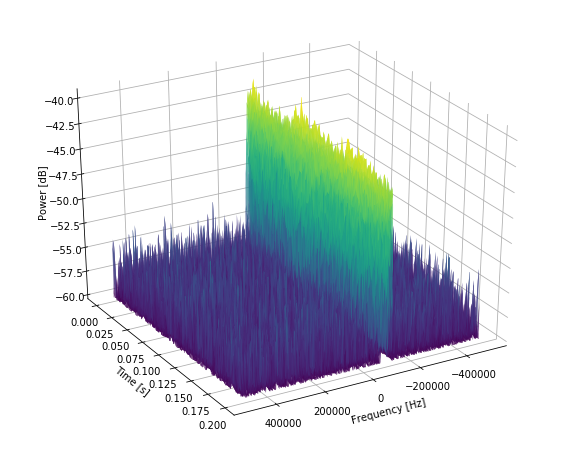

In [5]:
# the specsens plot functions make spectrum plotting a lot simpler

# use the 1d plot function to plot the power spectral density
ss.spectrum_plot_1d(sig=both[1024:2048],
                    f_sample=sample_freq,
                    window='flattop',
                    nfft=1024)

# use the 2d plot function to plot the spectogram
ss.spectrum_plot_2d(sig=both,
                    f_sample=sample_freq,
                    window='flattop',
                    nfft=1024)

# use the 3d plot function to plot the spectogram in 3d
ss.spectrum_plot_3d(sig=both,
                    f_sample=sample_freq,
                    window='flattop',
                    nfft=1024,
                    clip=-60,
                    smooth=.5,
                    elev=30,
                    azim=60)